In [113]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


In [114]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [115]:
#importing libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [116]:
# get the image (this image file is in my drive but shared publiclyt)
downloaded = drive.CreateFile({'id': '1HnTCPx8VzkN1jj6GiIlq5uBYS65CL-xu'}) # replace the id with id of file you want to access
downloaded.GetContentFile('logo.jpg') 

# **Ques 1. Convolution function:**

Defining different activation functions

In [117]:

def sigmoid(conv):
  output = 1 / (1 + np.exp(-conv))
  return output
def tanh(conv):
  output = np.tanh(conv)
  return output
def relu(conv):
  output = np.maximum(conv,0)
  return output
def prelu(conv):
  alpha = 0.1 #hyperparameter
  output = np.maximum(conv, alpha * conv)
  return output

  
     

Below, we define the class for convolutional layer using a custom Conv2D class. **Just for example**, We set the input channels to 3 (for RGB images), the output channels to 8, kernel size to 3, stride to 1 and also, padding to 1.
We will see the output activation map for different activation functions 


In [118]:

# taking default activation function as tanh
class Conv2D:
    def __init__(self, filters, in_channels, out_channels, kernel_size, stride=1, padding=0, activation_function=tanh):
        self.in_channels = in_channels
        self.out_channels = out_channels
        self.kernel_size = kernel_size
        self.stride = stride
        self.padding = padding
        self.activation_function = activation_function
        # self.filters = np.random.randn(out_channels, in_channels, kernel_size, kernel_size)

    def forward(self, X):
        num_images, _, height, width = X.shape
        output_height = int((height + 2 * self.padding - self.kernel_size) / self.stride) + 1
        output_width = int((width + 2 * self.padding - self.kernel_size) / self.stride) + 1
        output = np.zeros((num_images, self.out_channels, output_height, output_width))

        # Pad the input array
        X_padded = np.pad(X, ((0, 0), (0, 0), (self.padding, self.padding), (self.padding, self.padding)), mode="constant")

        # Perform the convolution
        for image_index in range(num_images):
            for filter_index in range(self.out_channels):
                for row in range(output_height):
                    for col in range(output_width):
                        output[image_index, filter_index, row, col] = np.sum(
                            X_padded[image_index, :, row * self.stride : row * self.stride + self.kernel_size, col * self.stride : col * self.stride + self.kernel_size]
                            * filters[filter_index]
                        )

                        # Applying the activation function
                        output[image_index, filter_index, row, col] = self.activation_function(output[image_index, filter_index, row, col])

        return output





Text(0.5, 1.0, 'Filter Kernel')

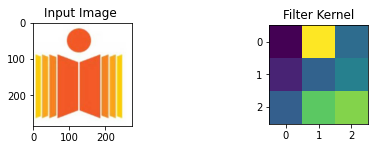

In [121]:
# Load the input image
input_image = plt.imread("logo.jpg")

# Convert the input image to a NumPy array in the correct format (BGR -> RGB and then HWC -> CHW)
input_array = input_image[:, :, ::-1]  # BGR to RGB
# Transpose the array to CHW format
input_array = np.transpose(input_array, (2, 0, 1))


# Add a batch dimension to the input array
input_batch = np.expand_dims(input_array, axis=0)

# Displaying the input image
plt.subplot(1, 3, 1)
plt.imshow(input_image)
plt.title("Input Image ")
plt.show

in_channels=3
out_channels=8
kernel_size=3 
stride=1
padding=1

filters = np.random.randn(out_channels, in_channels, kernel_size, kernel_size)
kernel_array = filters[0, 0]


# Displaying the filter kernel
plt.subplot(1, 3, 3)
plt.imshow(kernel_array)
plt.title("Filter Kernel")

Text(0.5, 1.0, 'Output Activation Map for sigmoid')

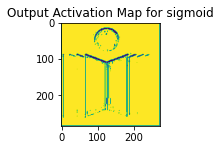

In [122]:
# Define the convolutional layer with sigmoid
conv_layer = Conv2D(filters, in_channels, out_channels, kernel_size, stride, padding, activation_function=sigmoid)

# Pass the input batch through the convolutional layer
output_batch = conv_layer.forward(input_batch)
# Convert the output batch to a NumPy array and remove the batch dimension
output_array = output_batch[0]

# Displaying the output activation map for sigmoid
plt.subplot(1, 3, 3)
plt.imshow(output_array[0]) 
plt.title("Output Activation Map for sigmoid")


Text(0.5, 1.0, 'Output Activation Map for tanh')

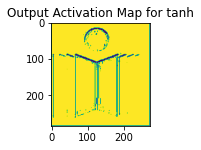

In [123]:
# Define the convolutional layer
conv_layer = Conv2D(filter, in_channels, out_channels, kernel_size, stride, padding, activation_function=tanh)


output_batch = conv_layer.forward(input_batch)
output_array = output_batch[0]

# Displaying the output activation map for tanh
plt.subplot(1, 3, 3)
plt.imshow(output_array[0]) 
plt.title("Output Activation Map for tanh")

Text(0.5, 1.0, 'Output Activation Map for relu')

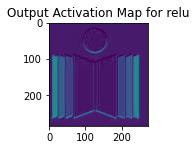

In [124]:
# Define the convolutional layer
conv_layer = Conv2D(filter, in_channels, out_channels, kernel_size, stride, padding, activation_function=relu)


output_batch = conv_layer.forward(input_batch)
output_array = output_batch[0]
# Displayng the output activation map for relu
plt.subplot(1, 3, 3)
plt.imshow(output_array[0]) 
plt.title("Output Activation Map for relu")

Text(0.5, 1.0, 'Output Activation Map for prelu')

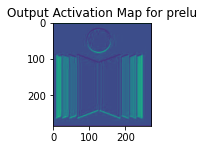

In [125]:
# Define the convolutional layer
conv_layer = Conv2D(filters, in_channels, out_channels, kernel_size, stride, padding, activation_function=prelu)


output_batch = conv_layer.forward(input_batch)
output_array = output_batch[0]

# Displaying the output activation map for prelu
plt.subplot(1, 3, 3)
plt.imshow(output_array[0]) 
plt.title("Output Activation Map for prelu")

# **Ques 2. Pooling function:**


Below pooling function performs max pooling on the activation map output from the convolution function, with the given pool size and stride.

It takes the following arguments as input:
* activation_map: numpy array of shape (height, width, channels)
* kernel_size: integer specifying the kernel size
* stride: integer specifying the stride

It returns:
* pooled_activation_map -- numpy array of shape (pooled_height, pooled_width, channels)
    

In [126]:
def max_pooling(activation_map, kernel_size, stride):
    
    # Determining the size of the output map
    height, width, channels = activation_map.shape
    pooled_height = (height - kernel_size) // stride + 1
    pooled_width = (width - kernel_size) // stride + 1
    
    # Initializing the output map
    pooled_activation_map = np.zeros((pooled_height, pooled_width, channels))
    
    # Performing max pooling
    for h in range(pooled_height):
        for w in range(pooled_width):
            h_start = h * stride
            h_end = h_start + kernel_size
            w_start = w * stride
            w_end = w_start + kernel_size
            pool_region = activation_map[h_start:h_end, w_start:w_end, :]
            pooled_activation_map[h, w, :] = np.amax(pool_region, axis=(0, 1))
    
    return pooled_activation_map





Text(0.5, 1.0, 'Pooled output')

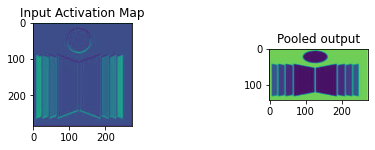

In [127]:

# Defining the input map (just for example)
input = output_array #this is actually the o/p activation map of convolution func considering prelu
kernel_size = 2
stride = 2

# Performing max pooling
pooled_activation_map = max_pooling(input, kernel_size, stride)

# Displaying the input activation map for maxpooling
plt.subplot(1, 3, 1)
plt.imshow(input[0]) 
plt.title("Input Activation Map")

# Displaying the pooled output after maxpooling
plt.subplot(1, 3, 3)
plt.imshow(pooled_activation_map[0]) 
plt.title("Pooled output")

# ax = plt.subplot(projection='3d')

# grid = np.meshgrid(np.arange(pooled_activation_map.shape[2]),
#                    np.arange(pooled_activation_map.shape[1]),
#                    np.arange(pooled_activation_map.shape[0]))

# x = ax.scatter(*grid, c=pooled_activation_map)
# plt.colorbar(x)


# **Ques 3. Convolution layer function:**

Below function *conv_layer* accepts the following arguments as input:
* input_volume: activation maps 
* num_filters: number of filters
* kernel_size: kernel dimensions
* stride
* padding
* non_linearity: the non-linear function 

And returns the input activation maps, the filter kernels and the output activation maps, which are displayed

In [128]:
def conv_layer(input_volume, num_filters, kernel_size, stride, padding, non_linearity):
    # Getting input volume dimensions
    H, W, C = input_volume.shape

    # Add padding to input volume
    if padding != 0:
        padded_volume = np.pad(input_volume, ((padding,padding),(padding,padding),(0,0)), 'constant')
    else:
        padded_volume = input_volume

    # Initializing output volume
    out_height = int((H + 2*padding - kernel_size) / stride) + 1
    out_width = int((W + 2*padding - kernel_size) / stride) + 1
    out_volume = np.zeros((out_height, out_width, num_filters))

    # Initializing the filter kernels
    kernels = np.random.randn(kernel_size, kernel_size, C, num_filters)

    # Convolve input volume with each filter kernel
    for f in range(num_filters):
        for i in range(0, H + 2*padding - kernel_size + 1, stride):
            for j in range(0, W + 2*padding - kernel_size + 1, stride):
                receptive_field = padded_volume[i:i+kernel_size, j:j+kernel_size, :]
                out_volume[(i//stride), (j//stride), f] = np.sum(receptive_field * kernels[:, :, :, f])

    # Applying non-linearity to output volume
    if non_linearity == 'sigmoid':
      out_volume = sigmoid(out_volume)
    if non_linearity == 'tanh':
      out_volume = tanh(out_volume)
    if non_linearity == 'relu':
      out_volume = relu(out_volume)
    if non_linearity == 'prelu':
      out_volume = prelu(out_volume)

    return input_volume, kernels, out_volume


# **Ques 4. Pooling layer function:**

Below is the implementation of *pooling_layer* function which accepts as input the activation map volume, pool, stride, an optional boolean variable and generates a pooled output volume with the same number of channels as the input volume.

By default, max pooling is getting done.

**For performing Global Average Pooling**, the variable global_avg_pool needs to be set to True

In [129]:
def pooling_layer(volume, pool_size, stride, global_avg_pool=False):
    # Getting the dimensions of the input volume
    input_H, input_W, input_C = volume.shape
    
    # Calculating the output volume dimensions based on the pooling function and stride
    if global_avg_pool:
        output_height, output_width = 1, 1
    else:
        output_height = ((input_H - pool_size) // stride) + 1
        output_width = ((input_W - pool_size) // stride) + 1
    
    # Initializing the output volume
    output_volume = np.zeros((output_height, output_width, input_C))
    
    # Applying pooling on each channel of the input volume
    for channel in range(input_C):
        # Slicing the channel of the input volume
        channel_slice = volume[:,:,channel]
        
        if global_avg_pool:  #Global average pooling
            output_volume[0, 0, channel] = np.mean(channel_slice)
        else: # Max pooling on the channel
            for i in range(output_height):
                for j in range(output_width):
                    # Slice the input volume based on the pooling function and stride
                    slice_height_start = i * stride
                    slice_height_end = slice_height_start + pool_size
                    slice_width_start = j * stride
                    slice_width_end = slice_width_start + pool_size
                    slice = channel_slice[slice_height_start:slice_height_end, slice_width_start:slice_width_end]
                    
                    # Apply the pooling function to the slice
                    output_volume[i, j, channel] = np.max(slice) # using max pooling

    return volume, output_volume


# **Ques 5. Flattening (unraveling) function:**

Below is the implementation of *flatten* function that accepts as input the activation map volume output of the above pooling layer and generates a 1D vector that can be fed to fully connected layers

In [130]:
def flatten(pool_output, weight_matrix):
    # Get the shape of the activation map volume
    shape = pool_output.shape

    # Flatten the activation map volume into a 1D array
    flat_pool = pool_output.flatten()
    flat_pool = flat_pool.reshape(-1,1)

    # Performing matrix multiplication with the weight matrix
    output = np.dot(flat_pool,weight_matrix)


    # Reshaping the output to the desired size
    output = output.reshape(-1, 1)

    return output


# **Ques 6. Multilayer Perceptron (MLP) function:**

Defining the softmax function

In [131]:
def softmax(x):
    exp_x = np.exp(x)
    return exp_x / np.sum(exp_x, axis=0)

Below is the implementation of the required *MLP* function

Its input parameters are:

* input_vector: A 1D numpy array, which is the output of flatten function.
* num_hidden_layers: An integer specifying the number of hidden layers in the MLP.
* hidden_layer_size: A list containing the number of neurons in each hidden layer.
* activation_function: A non-linear activation function that gets applied to the output of each hidden layer.
* output_layer_size: An integer specifying the number of neurons in the output layer.
* softmax_output: A boolean flag indicating whether to apply the softmax function to the output layer. Default value is kept as True.

In [132]:
def MLP(input_vector, num_hidden_layers, hidden_layer_size, activation_function, output_layer_size, softmax_output=True):
    # Initializing weights and biases
    weights = []
    biases = []
    num_inputs = input_vector.shape[0]
    for i in range(num_hidden_layers):
        if i == 0:
            weights.append(np.random.randn(hidden_layer_size[i], num_inputs))
        else:
            weights.append(np.random.randn(hidden_layer_size[i], hidden_layer_size[i-1]))
        biases.append(np.random.randn(hidden_layer_size[i], 1))
    weights.append(np.random.randn(output_layer_size, hidden_layer_size[-1]))
    biases.append(np.random.randn(output_layer_size, 1))

    # Forward propagation
    output = input_vector
    for i in range(num_hidden_layers):
        # Applying non-linearity to output volume
        if activation_function == 'sigmoid':
          output = sigmoid(np.dot(weights[i], output) + biases[i])
        if activation_function == 'tanh':
          output = tanh(np.dot(weights[i], output) + biases[i])
        if activation_function == 'relu':
          output = relu(np.dot(weights[i], output) + biases[i])
        if activation_function == 'prelu':
          output = prelu(np.dot(weights[i], output) + biases[i])

    output = np.dot(weights[-1], output) + biases[-1]

    # Checking if flag for softmax function is set for output layer 
    if softmax_output:
        output = softmax(output)

    return output


# **Ques 7. Feed-forward path:**

**Loading the CIFAR-10 dataset**

In [133]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [134]:
import numpy as np
print(np.unique(y_train))

[0 1 2 3 4 5 6 7 8 9]


In [135]:
print(x_train[0].shape)

(32, 32, 3)


**Implementing the feed forward path as a composition function** 

In [138]:
def feed_forward(input_volume, return_flattening_layer_output=False):

  # Applying 1st Convolution Layer

  # Initializing convolution layer parameters
  num_filters = 16
  kernel_size = 3
  stride = 1
  padding = 1
  non_linearity = 'sigmoid'

  # Applying convolution layer function
  input_volume, filter_kernels, output_activation_maps =  conv_layer(input_volume, num_filters, kernel_size, stride, padding, non_linearity)

  # Displaying the input activation maps, the filter kernels and the output activation maps.
  print('Shape of Input activation maps for conv layer 1: ', input_volume.shape) #shape = (32,32,3)
  print('Shape of Filter kernels for conv layer 1: ', filter_kernels.shape) #shape = (3,3,3,16)
  print('Shape of Output activation maps for conv layer 1: ', output_activation_maps.shape) #shape = (32,32,16)
  print()


  # Applying 1st Max Pooling Layer

  # Apply max pooling with a pool size of 2 and stride of 2
  pool_size = 2
  stride = 2
  input_volume, pooled_volume = pooling_layer(output_activation_maps, pool_size, stride)

  #For displaying input and output volumes
  print('Shape of Input volume for Max pooling layer 1: ', input_volume.shape) #shape = (32,32,16)
  print('Shape of Output volume for Max pooling layer 1: ', pooled_volume.shape) #shape = (16,16,16)
  print()


  #Applying 2nd Convolution Layer

  input_volume = pooled_volume
  # Initializing convolution layer parameters
  num_filters = 8
  kernel_size = 3
  stride = 1
  padding = 1
  non_linearity = 'sigmoid'

  # Applying convolution layer function
  input_volume, filter_kernels, output_activation_maps =  conv_layer(input_volume, num_filters, kernel_size, stride, padding, non_linearity)

  # Displaying the input activation maps, the filter kernels and the output activation maps.
  print('Shape of Input activation maps for conv layer 2: ', input_volume.shape) #shape = (16,16,16)
  print('Shape of Filter kernels for conv layer 2: ', filter_kernels.shape) #shape = (3,3,16,8)
  print('Shape of Output activation maps for conv layer 2: ', output_activation_maps.shape) #shape = (16,16,8)
  print()


  #Applying 2nd Max Pooling layer

  # Apply max pooling with a pool size of 2 and stride of 2
  pool_size = 2
  stride = 2
  input_volume, pooled_volume = pooling_layer(output_activation_maps, pool_size, stride)

  #For displaying input and output volumes
  print('Shape of Input volume for Max Pooling layer 2: ', input_volume.shape) #shape = (16,16,8)
  print('Shape of Output volume for Max Pooling layer 2: ', pooled_volume.shape) #shape = (8,8,8)
  print()


  #Applying Global Average Pooling (GAP) layer

  input_volume, pooled_volume = pooling_layer(pooled_volume, None, None, True)
  #Note that pool size and stride not required for global average pooling

  #For displaying input and output volumes
  print('Shape of Input volume for GAP layer: ', input_volume.shape) #shape = (8,8,8)
  print('Shape of Output volume for GAP layer: ', pooled_volume.shape) #dimension = (1,1,8)
  print()


  #Applying Flattening function

  input_size = pooled_volume.shape[0] * pooled_volume.shape[1] * pooled_volume.shape[2] #height * width * depth 
  output_size = 1
  #initializing the weight matrix
  weight_matrix = np.random.randn(output_size, input_size)
  # print(weight_matrix.shape)
  flatten_output = flatten(pooled_volume, weight_matrix)
  # print(flatten_output.shape)
  if return_flattening_layer_output == True:
    return flatten_output


  # Applying MLP function

  num_hidden_layers = 1
  hidden_layer_size = [20]
  activation_function = 'sigmoid'
  output_layer_size = 10

  output_with_softmax = MLP(flatten_output, num_hidden_layers, hidden_layer_size, activation_function, output_layer_size)
  output_without_softmax = MLP(flatten_output, num_hidden_layers, hidden_layer_size, activation_function, output_layer_size, softmax_output=False)

  return output_with_softmax, output_without_softmax



In [139]:
input_volume = x_train[0] #providing one image of cifar-10 dataset as input
output_with_softmax, output_without_softmax = feed_forward(input_volume) 
print()
print('Final output with softmax: ', output_with_softmax)
print('Final output without softmax: ', output_without_softmax)

Shape of Input activation maps for conv layer 1:  (32, 32, 3)
Shape of Filter kernels for conv layer 1:  (3, 3, 3, 16)
Shape of Output activation maps for conv layer 1:  (32, 32, 16)

Shape of Input volume for Max pooling layer 1:  (32, 32, 16)
Shape of Output volume for Max pooling layer 1:  (16, 16, 16)

Shape of Input activation maps for conv layer 2:  (16, 16, 16)
Shape of Filter kernels for conv layer 2:  (3, 3, 16, 8)
Shape of Output activation maps for conv layer 2:  (16, 16, 8)

Shape of Input volume for Max Pooling layer 2:  (16, 16, 8)
Shape of Output volume for Max Pooling layer 2:  (8, 8, 8)

Shape of Input volume for GAP layer:  (8, 8, 8)
Shape of Output volume for GAP layer:  (1, 1, 8)


Final output with softmax:  [[3.22870044e-02]
 [1.31988657e-05]
 [3.70875303e-03]
 [6.07071925e-03]
 [2.22181816e-02]
 [4.25388939e-01]
 [1.12468463e-05]
 [3.99880454e-01]
 [1.10359744e-01]
 [6.17593368e-05]]
Final output without softmax:  [[-4.66437171]
 [-1.62790917]
 [ 5.27856583]
 [-2

**Verifying dimensions of the output volume of convolution layer function:**

As we can see above, output of the convolution layer functions have 3 dimensions. These dimensions represent H, W, C. So, we can say the
output of this function have the expected size. (**verified**)

**Verifying the feed_forward function accepts an image input and outputs a vector:**

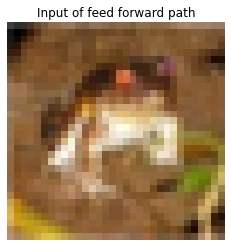

In [69]:
plt.figure()
plt.imshow(input_volume)
plt.title('Input of feed forward path')
plt.axis('off')
plt.show()

So, the input of the feed forward function is an image and also as visible above, the final output with/without softmax is a vector. So, clearly, we can see that the feed_forward function, which is composition of functions, accepts an image input and outputs a vector (**verified**)

# **Ques 8(a):**

**Choosing an image from each of the 10 classes and displaying the output vector for each case**.

In [141]:
vectors=[]

# Defining the class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Choosing a random image from each class of CIFAR-10 dataset
for i in range(10):
    # Find the index of a random image in the current class
    idx = np.random.choice(np.where(y_train == i)[0])
    
    # Selecting the image
    img = x_train[idx]

    print('For image of class ',i+1,': \n')
    output_with_softmax, output_without_softmax = feed_forward(img)
    vectors.append(output_with_softmax)

For image of class  1 : 

Shape of Input activation maps for conv layer 1:  (32, 32, 3)
Shape of Filter kernels for conv layer 1:  (3, 3, 3, 16)
Shape of Output activation maps for conv layer 1:  (32, 32, 16)

Shape of Input volume for Max pooling layer 1:  (32, 32, 16)
Shape of Output volume for Max pooling layer 1:  (16, 16, 16)

Shape of Input activation maps for conv layer 2:  (16, 16, 16)
Shape of Filter kernels for conv layer 2:  (3, 3, 16, 8)
Shape of Output activation maps for conv layer 2:  (16, 16, 8)

Shape of Input volume for Max Pooling layer 2:  (16, 16, 8)
Shape of Output volume for Max Pooling layer 2:  (8, 8, 8)

Shape of Input volume for GAP layer:  (8, 8, 8)
Shape of Output volume for GAP layer:  (1, 1, 8)

For image of class  2 : 

Shape of Input activation maps for conv layer 1:  (32, 32, 3)
Shape of Filter kernels for conv layer 1:  (3, 3, 3, 16)
Shape of Output activation maps for conv layer 1:  (32, 32, 16)

Shape of Input volume for Max pooling layer 1:  (32, 3

**Displaying the output vectors with softmax for all 10 classes of cifar-10**

In [143]:
for i in range(0,len(vectors)):
  print('Output vector a random image of class ',i+1,': \n')
  print(vectors[i])
  print()

Output vector a random image of class  1 : 

[[4.53173200e-04]
 [9.33453218e-03]
 [4.50906117e-03]
 [1.29762813e-03]
 [3.81311596e-01]
 [5.67600819e-01]
 [2.71821786e-03]
 [9.50062070e-03]
 [1.93513452e-03]
 [2.13392175e-02]]

Output vector a random image of class  2 : 

[[2.21599494e-04]
 [2.42134731e-01]
 [6.83142470e-03]
 [1.78298725e-02]
 [2.59364215e-03]
 [3.94189700e-03]
 [2.38986224e-03]
 [6.38384018e-03]
 [7.08305120e-01]
 [9.36801067e-03]]

Output vector a random image of class  3 : 

[[0.32732561]
 [0.07526087]
 [0.08017217]
 [0.2080278 ]
 [0.06204662]
 [0.07630189]
 [0.00174845]
 [0.03919961]
 [0.04888429]
 [0.0810327 ]]

Output vector a random image of class  4 : 

[[2.88858471e-02]
 [4.23475784e-01]
 [1.76051479e-03]
 [8.75413689e-02]
 [2.47374226e-03]
 [8.83324927e-05]
 [9.82493737e-02]
 [5.24128286e-05]
 [3.56972197e-01]
 [5.00426813e-04]]

Output vector a random image of class  5 : 

[[7.30888393e-04]
 [2.69126360e-02]
 [1.84496471e-01]
 [7.02936220e-03]
 [2.65593539e-0

**Trend in the output vectors:**
* The output vectors generated using softmax have values between 0 and 1, and their sum is always equal to 1.
* Also, it seems like the output vector places higher probabilities on the classes that the model considers more likely given the input data.

# **Ques 8.(b):**

**Q)** Does a randomly initialized network show any discriminability?

**Ans:** As the network's weights and biases have not yet been trained to extract features and categorise input data, a convolutional neural network (CNN) that has been randomly initialized often does not exhibit any meaningful discriminability.

When a CNN is initialized randomly, its weights and biases are frequently initialised with small random values, which lack any intrinsic capacity to distinguish between various input data classes. Hence, the CNN's output on any input data would be random and useless for categorization.

However, a randomly initialized CNN can still have some degree of discriminability due to the nonlinearity of the activation functions used in the network. The activation functions used in a CNN, such as ReLU or sigmoid, introduce nonlinearity into the network and allow it to learn complex patterns in the data. While the network's weights and biases are initially random, the activation functions can still enable the network to extract some discriminative features from the input data.

But the overall discriminability of a randomly initialized CNN is generally poor. In order for the network to acquire useful features and achieve high accuracy in classification tasks, a significant amount of labelled data would need to be used during training.

**Plotting the bottleneck layer (output of flattening layer) using PCA (builtin function) in 2D by choosing three images per class from CIFAR-10.**

In [144]:
# Selecting three images per class from CIFAR-10 dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

num_images_per_class = 3
selected_images = []
for i in range(10):
    class_indices = np.where(y_train == i)[0][:num_images_per_class]
    selected_images.append(x_train[class_indices])
    
selected_images = np.concatenate(selected_images, axis=0)
print(selected_images.shape) #(30, 32, 32, 3)

(30, 32, 32, 3)


In [146]:
flatten_vectors=[]

for i in range(0,len(selected_images)):

    print('For image ',i+1,': \n')
    flatten_output = feed_forward(selected_images[i],True)
    flatten_vectors.append(flatten_output)
   

For image  1 : 

Shape of Input activation maps for conv layer 1:  (32, 32, 3)
Shape of Filter kernels for conv layer 1:  (3, 3, 3, 16)
Shape of Output activation maps for conv layer 1:  (32, 32, 16)

Shape of Input volume for Max pooling layer 1:  (32, 32, 16)
Shape of Output volume for Max pooling layer 1:  (16, 16, 16)

Shape of Input activation maps for conv layer 2:  (16, 16, 16)
Shape of Filter kernels for conv layer 2:  (3, 3, 16, 8)
Shape of Output activation maps for conv layer 2:  (16, 16, 8)

Shape of Input volume for Max Pooling layer 2:  (16, 16, 8)
Shape of Output volume for Max Pooling layer 2:  (8, 8, 8)

Shape of Input volume for GAP layer:  (8, 8, 8)
Shape of Output volume for GAP layer:  (1, 1, 8)

For image  2 : 

Shape of Input activation maps for conv layer 1:  (32, 32, 3)
Shape of Filter kernels for conv layer 1:  (3, 3, 3, 16)
Shape of Output activation maps for conv layer 1:  (32, 32, 16)

Shape of Input volume for Max pooling layer 1:  (32, 32, 16)
Shape of Ou

In [147]:
flatten_vectors = np.array(flatten_vectors) #converting list to array
flatten_vectors_2D = flatten_vectors.reshape(flatten_vectors.shape[0], -1) 
print(flatten_vectors_2D.shape)


(30, 64)


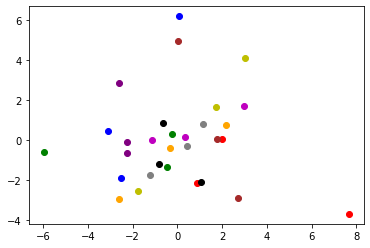

In [148]:
# Plotting the bottleneck layer using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
bottleneck_features_2d = pca.fit_transform(flatten_vectors_2D)

# Plotting 2D representation of bottleneck layer
import matplotlib.pyplot as plt

colors = ['r', 'b', 'g', 'purple', 'm', 'y', 'k', 'orange', 'grey', 'brown']
fig, ax = plt.subplots()

for i in range(10):
    ax.scatter(bottleneck_features_2d[i*num_images_per_class:(i+1)*num_images_per_class, 0], 
               bottleneck_features_2d[i*num_images_per_class:(i+1)*num_images_per_class, 1], 
               color=colors[i], label=class_names[i])
